In [1]:
# Data - 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE
# Source: https://github.com/CSSEGISandData/COVID-19 

This notebook is used to generate the following viz:
* World Infection Map;
* World Rankings;
* Confirmed, Deaths, Recovered, and Actives Timeseries;

In [2]:
# Data From https://www.kaggle.com/imdevskp/corona-virus-report
import numpy as np
import pandas as pd 
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import moviepy.editor as mp
from IPython.display import Video
import imageio
from methods import *

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[~world.name.isin(["Antarctica", "Fr. S. Antarctic Lands"])]
#PATH = "C:/py/covid19/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/"
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
path = 'data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/'

file = '04-27-2020.csv'
today = '04-27-2020'
today = pd.to_datetime(today, format = "%m-%d-%Y")
df = pd.read_csv(path+file)
df.head()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-28 02:30:51,34.223334,-82.461707,29,0,0,29,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-28 02:30:51,30.295065,-92.414197,130,9,0,121,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-28 02:30:51,37.767072,-75.632346,195,3,0,192,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-28 02:30:51,43.452658,-116.241552,650,15,0,635,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-28 02:30:51,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


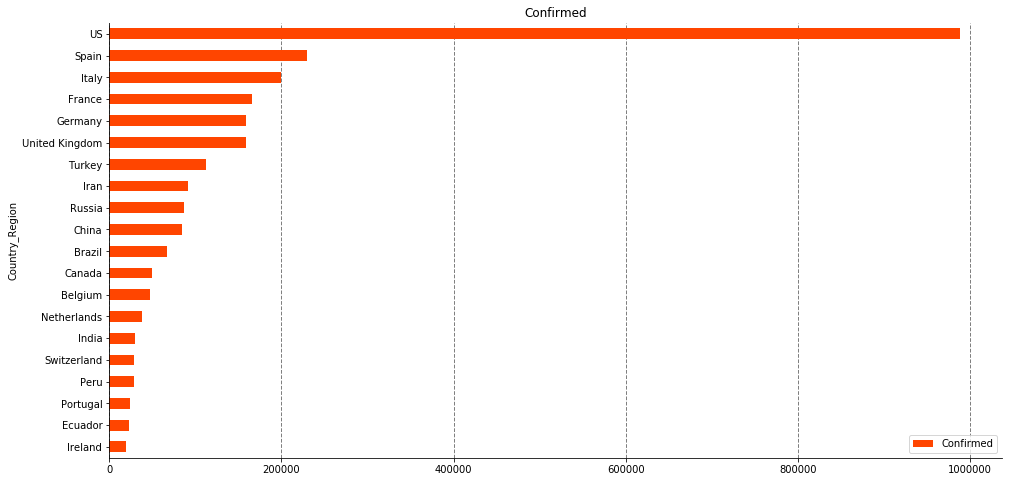

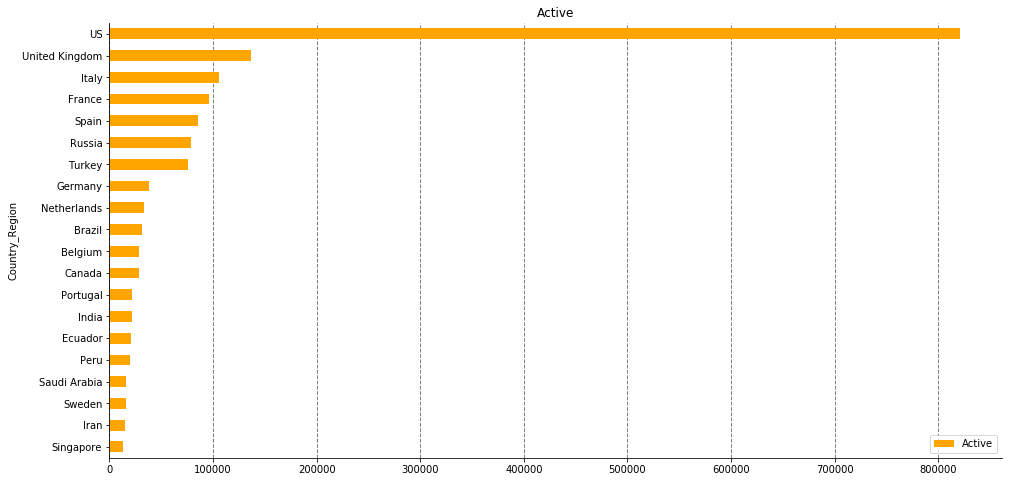

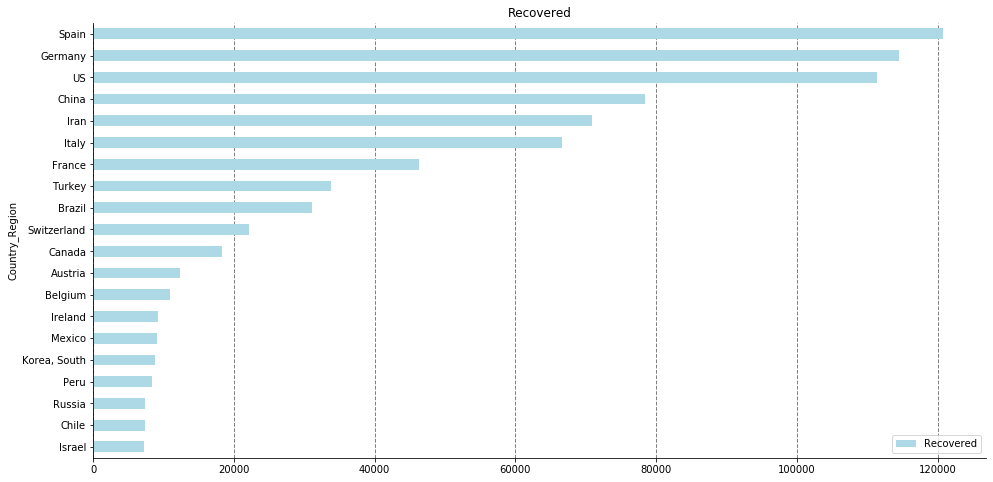

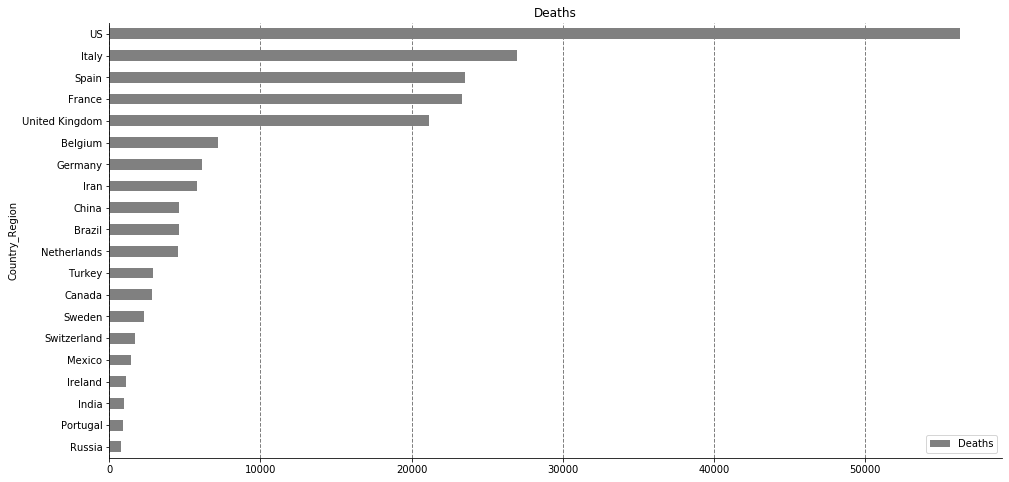

In [3]:
plot_rank('Confirmed', 20, 'orangered')
plot_rank('Active', 20, 'orange')
plot_rank('Recovered', 20, 'lightblue')
plot_rank('Deaths', 20, 'grey')

# TIMESERIES

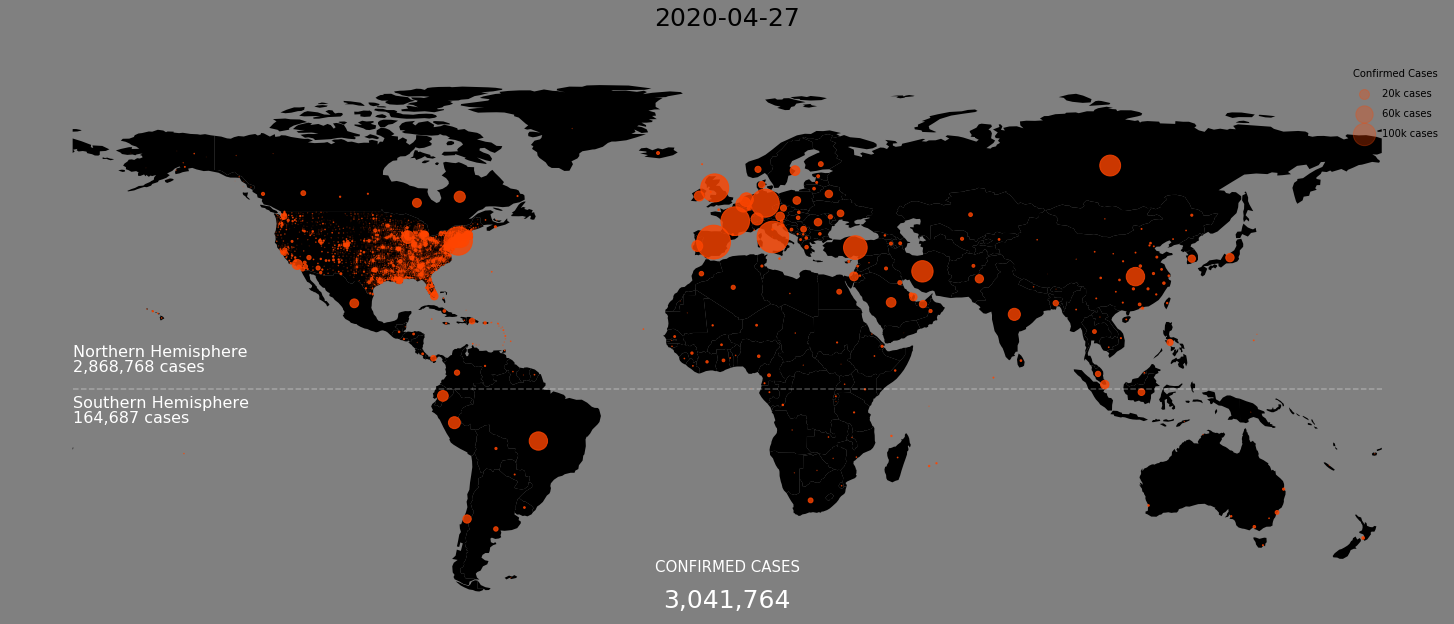

In [4]:
plot_map(df, today)

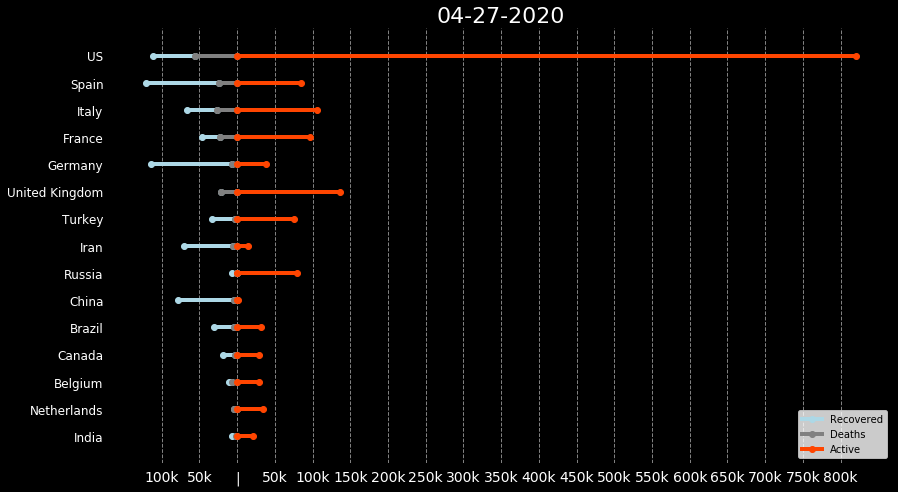

In [5]:
get_rank()

In [6]:
plt.close('all')

## Trends

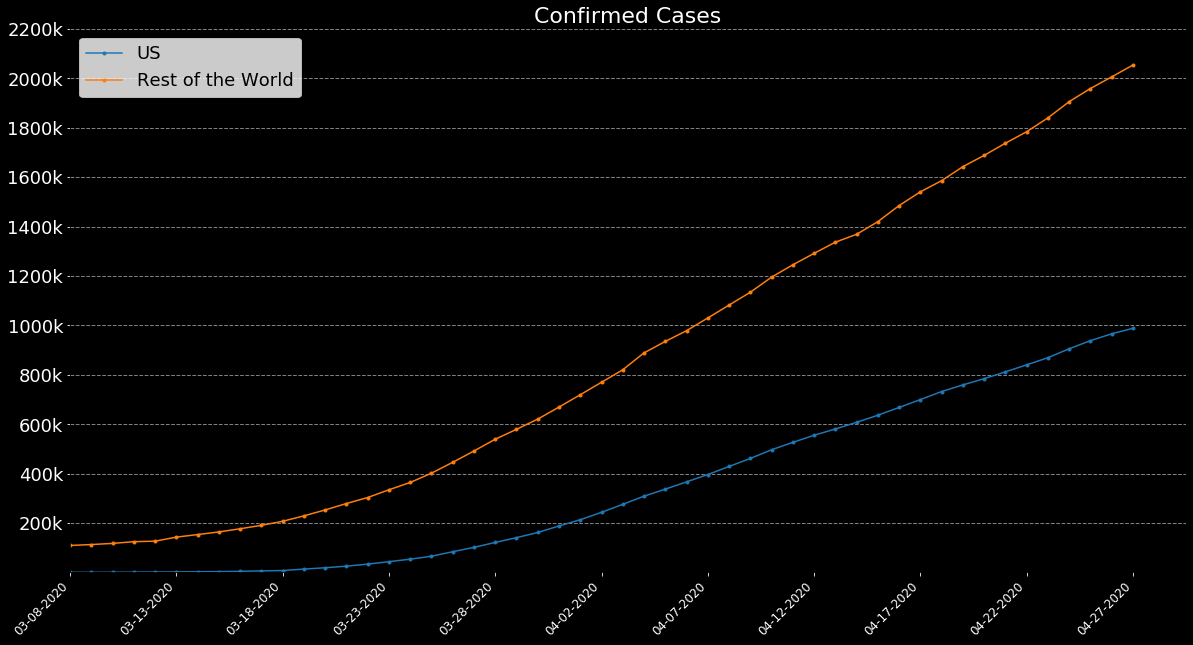

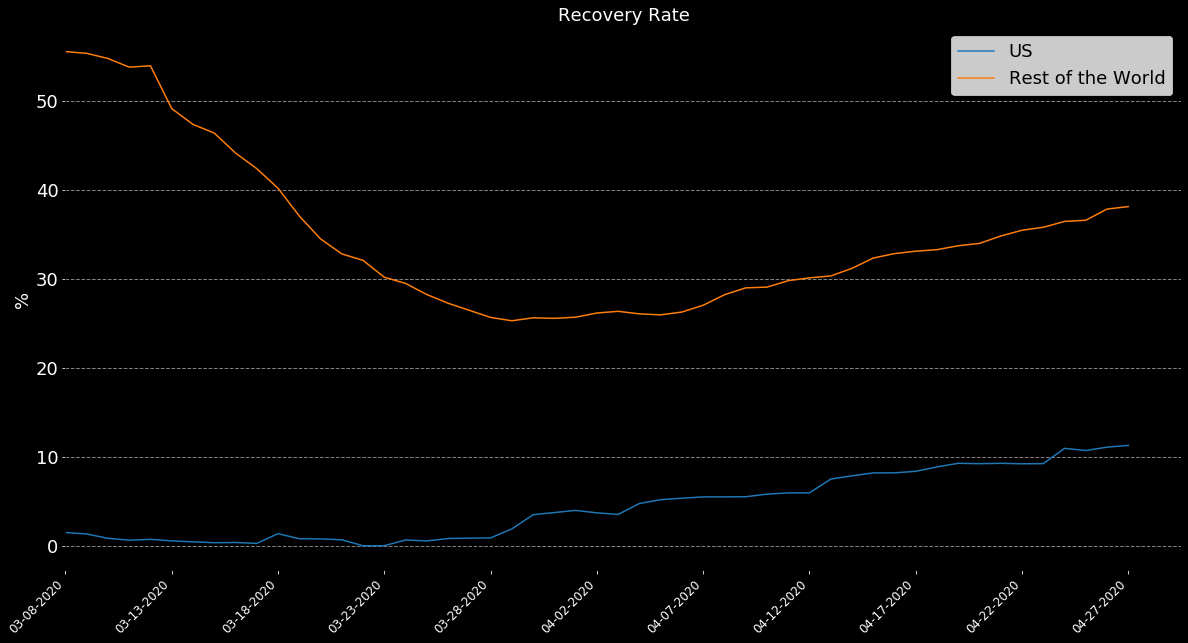

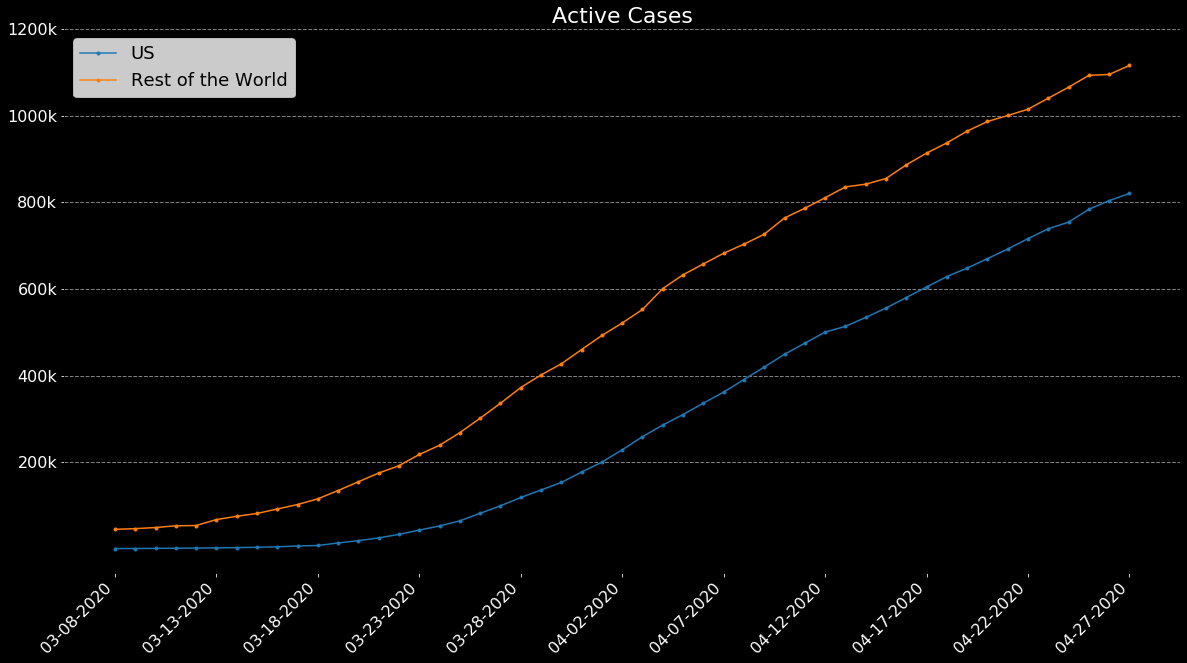

In [24]:
# US hit 500 on 03-08-2020
# Italy hit 500 on 02-27-2020
# Spain hit 500 on 03-07-2020
# Germany hit 500 on 03-06-2020

# Infected People

fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

# plot
plot_contry(ax, ['US'], '03-08-2020', '03-09-2020')
plot_contry(ax, ['US'], '03-08-2020', '03-09-2020', inverse=True)

# yticks
yticks = np.arange(200000, 2200001, 200000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]
plt.yticks(yticks, labels = yticks_label, fontsize=18)

# details
plt.xlim(0,)
plt.ylim(0,)
plt.legend(['US', 'Rest of the World'], fontsize=18)

plt.savefig('img/conf_us.png', facecolor='black', edgecolor='none')
#plt.show()
# Mortality

# Recovery
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry_r(ax, ['US'], '03-08-2020', '03-09-2020')
plot_contry_r(ax, ['US'], '03-08-2020', '03-09-2020', inverse=True)
plt.xlim(0,)

plt.legend(['US', 'Rest of the World'], fontsize=18)
plt.savefig('img/rec_us.png', facecolor='black', edgecolor='none')
#plt.show()

# Active
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry_a(ax, ['US'], '03-08-2020', '03-09-2020')
plot_contry_a(ax, ['US'], '03-08-2020', '03-09-2020', inverse=True)
yticks = np.arange(200000, 1200001, 200000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]

plt.yticks(yticks, labels = yticks_label, fontsize=16)
plt.xticks(fontsize=16)
plt.legend(['US', 'Rest of the World'], fontsize=18)

plt.savefig('img/active_us.png', facecolor='black', edgecolor='none')
#plt.show()

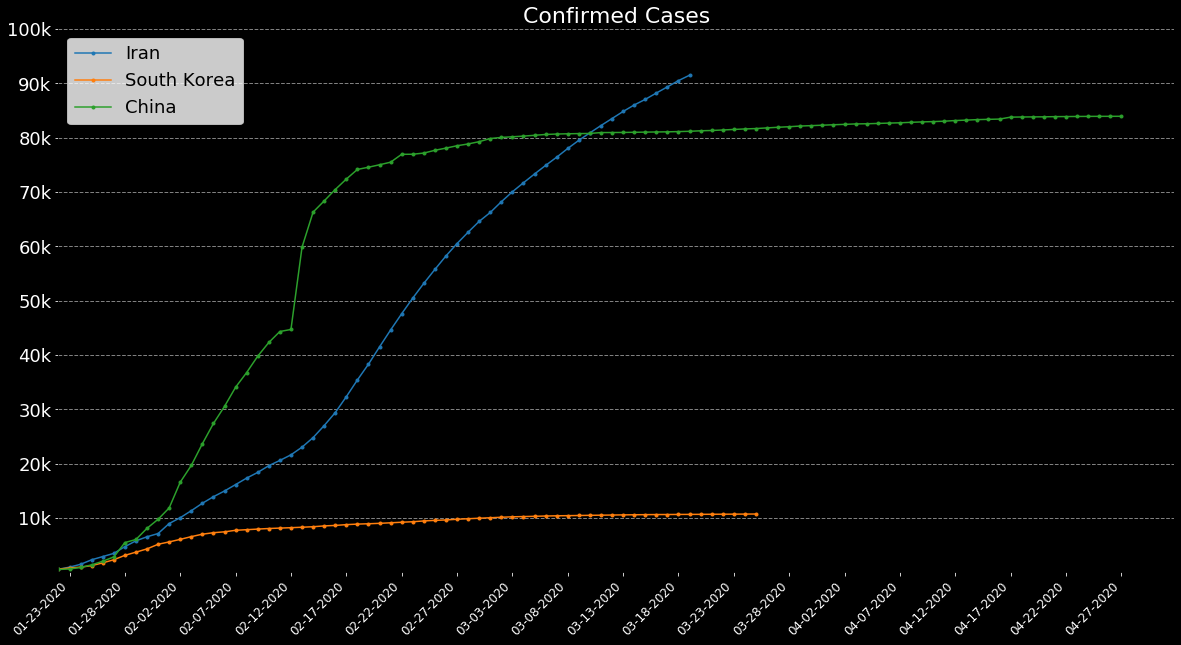

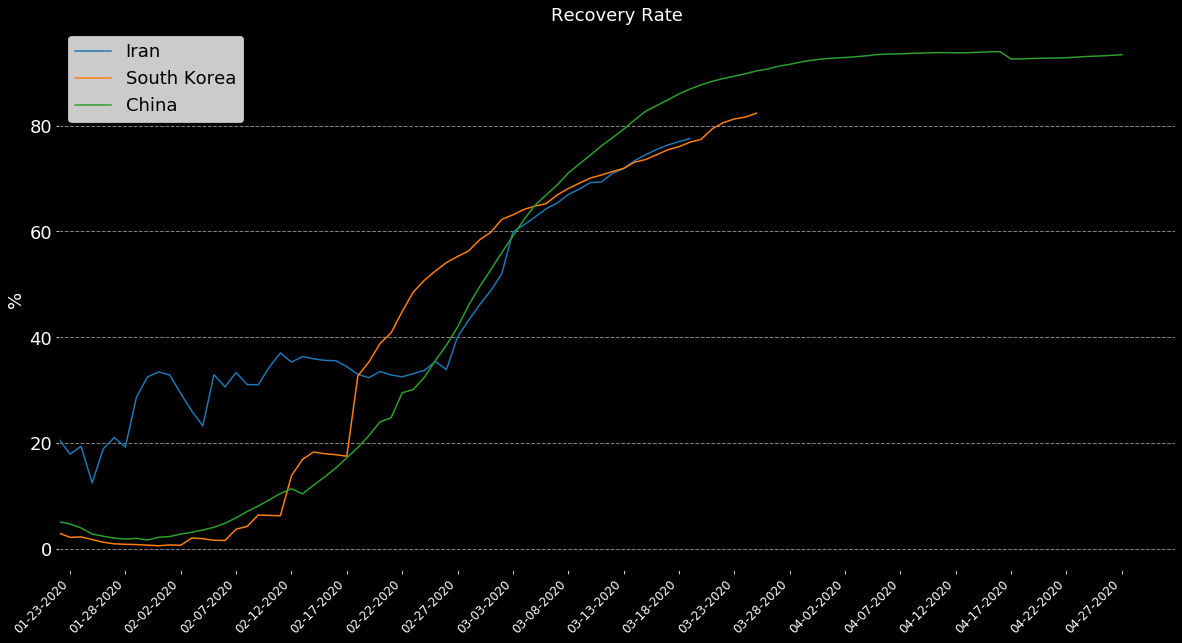

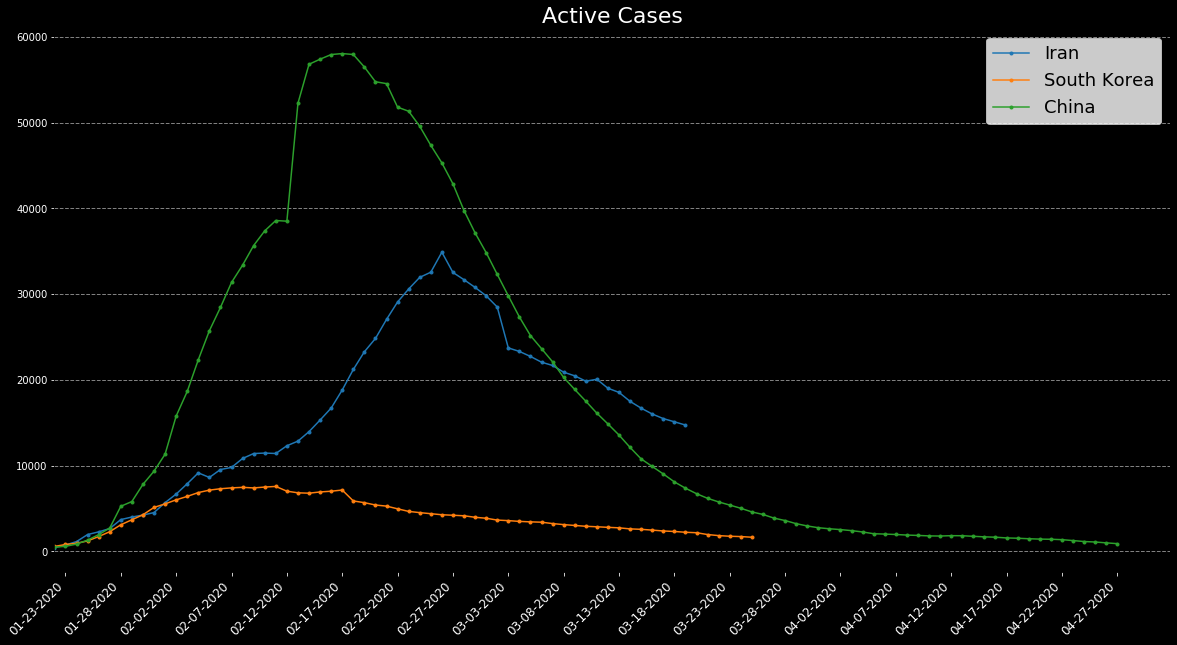

In [8]:
# Infected People

fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry(ax, ['Iran'], '02-29-2020', '03-01-2020')
plot_contry(ax, ['South Korea', 'Korea, South'], '02-23-2020', '02-24-2020')
plot_contry(ax, ['China', 'Mainland China'])

yticks = np.arange(10000, 100001, 10000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]

plt.yticks(yticks, labels = yticks_label, fontsize=18)

plt.xlim(0,)
plt.ylim(0,)
plt.legend(['Iran', 'South Korea', 'China'], fontsize=18)
plt.savefig('img/conf_china.png', facecolor='black', edgecolor='none')

# Recovery

fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry_r(ax, ['Iran'], '02-29-2020', '03-01-2020')
plot_contry_r(ax, ['South Korea', 'Korea, South'], '02-23-2020', '02-24-2020')
plot_contry_r(ax, ['China', 'Mainland China'], inverse=False)

plt.xlim(0,)

plt.legend(['Iran', 'South Korea', 'China'], fontsize=18)
plt.savefig('img/rec_china.png', facecolor='black', edgecolor='none')

# Active

fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry_a(ax, ['Iran'], '02-29-2020', '03-01-2020')
plot_contry_a(ax, ['South Korea', 'Korea, South'], '02-23-2020', '02-24-2020')
plot_contry_a(ax, ['China', 'Mainland China'], inverse=False)

plt.xlim(0,)

plt.legend(['Iran', 'South Korea', 'China'], fontsize=18)
plt.savefig('img/active_china.png', facecolor='black', edgecolor='none')

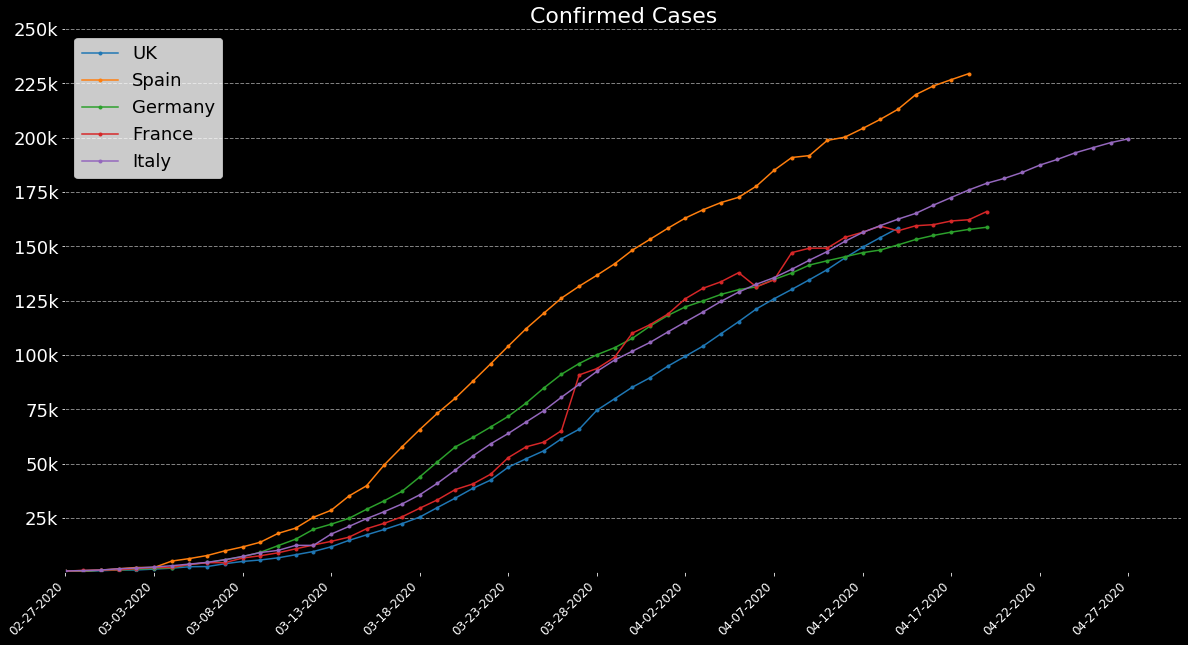

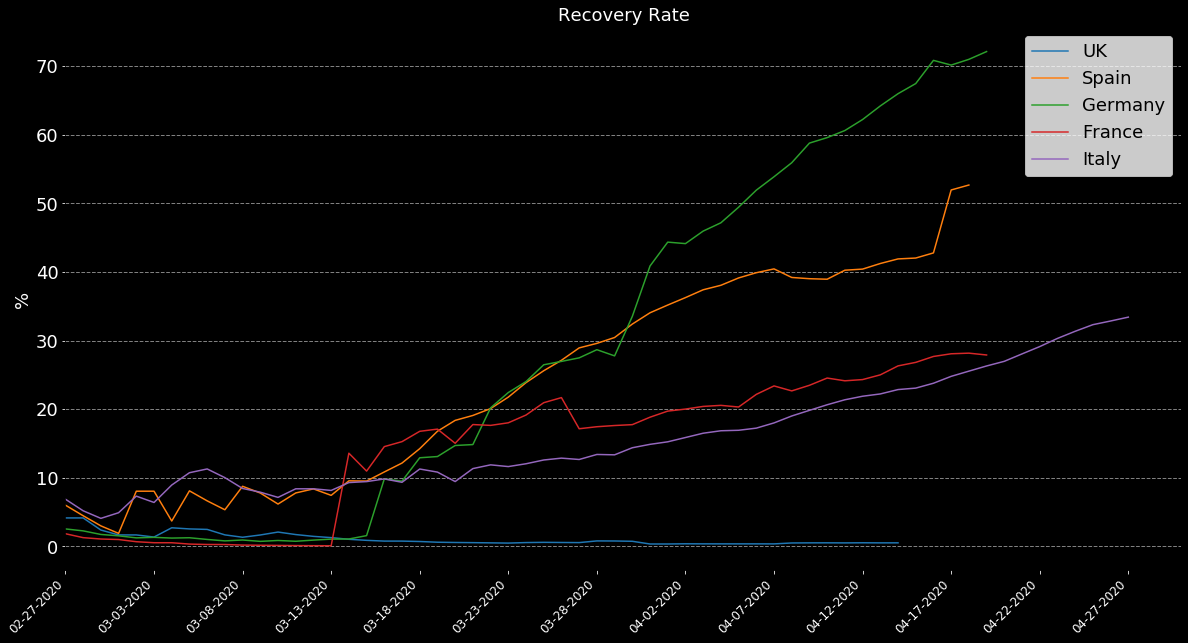

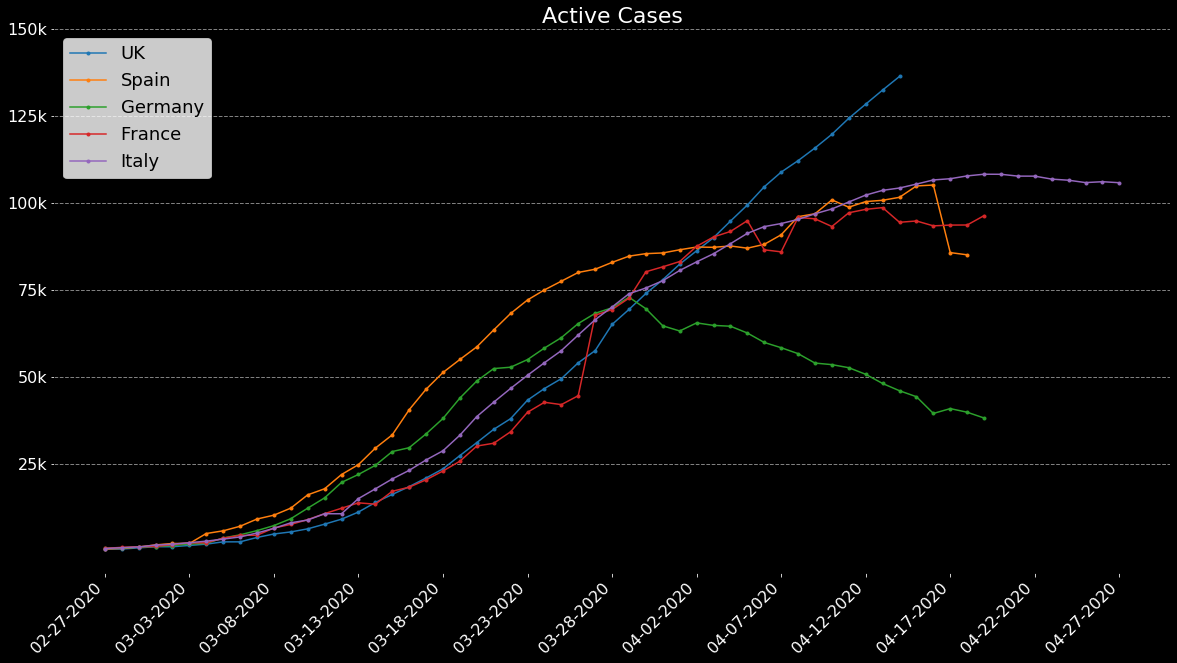

In [9]:
# US hit 500 on 03-08-2020
# Italy hit 500 on 02-27-2020
# Spain hit 500 on 03-07-2020
# Germany hit 500 on 03-06-2020

# Infected People

fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

# plot
#plot_contry(['US'], '03-08-2020', '03-09-2020')
plot_contry(ax, ['United Kingdom'], '03-06-2020', '03-07-2020')
plot_contry(ax, ['Spain'], '03-07-2020', '03-08-2020')
plot_contry(ax, ['Germany'], '03-06-2020', '03-07-2020')
plot_contry(ax, ['France'], '03-06-2020', '03-07-2020')
plot_contry(ax, ['Italy'], '02-27-2020', '02-28-2020')

# yticks
yticks = np.arange(25000, 250001, 25000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]
plt.yticks(yticks, labels = yticks_label, fontsize=18)

# details
plt.xlim(0,)
plt.ylim(0,)
plt.legend(['UK', 'Spain', 'Germany', 'France', 'Italy'], fontsize=18)

plt.savefig('img/conf_top.png', facecolor='black', edgecolor='none')

# Recovery
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

#plot_contry_r(['US'], '03-08-2020', '03-09-2020')
plot_contry_r(ax, ['United Kingdom'], '03-06-2020', '03-07-2020')
plot_contry_r(ax, ['Spain'], '03-07-2020', '03-08-2020')
plot_contry_r(ax, ['Germany'], '03-06-2020', '03-07-2020')
plot_contry_r(ax, ['France'], '03-06-2020', '03-07-2020')
plot_contry_r(ax, ['Italy'], '02-27-2020', '02-28-2020')

plt.xlim(0,)

plt.legend(['UK', 'Spain', 'Germany', 'France', 'Italy'], fontsize=18)
plt.savefig('img/rec_top.png', facecolor='black', edgecolor='none')

# Active
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

#plot_contry_a(['US'], '03-08-2020', '03-09-2020')
plot_contry_a(ax, ['United Kingdom'], '03-06-2020', '03-07-2020')
plot_contry_a(ax, ['Spain'], '03-07-2020', '03-08-2020')
plot_contry_a(ax, ['Germany'], '03-06-2020', '03-07-2020')
plot_contry_a(ax, ['France'], '03-06-2020', '03-07-2020')
plot_contry_a(ax, ['Italy'], '02-27-2020', '02-28-2020')

yticks = np.arange(25000, 150001, 25000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]

plt.yticks(yticks, labels = yticks_label, fontsize=16)
plt.xticks(fontsize=16)
plt.legend(['UK', 'Spain', 'Germany', 'France', 'Italy'], fontsize=18)

plt.savefig('img/active_top.png', facecolor='black', edgecolor='none')

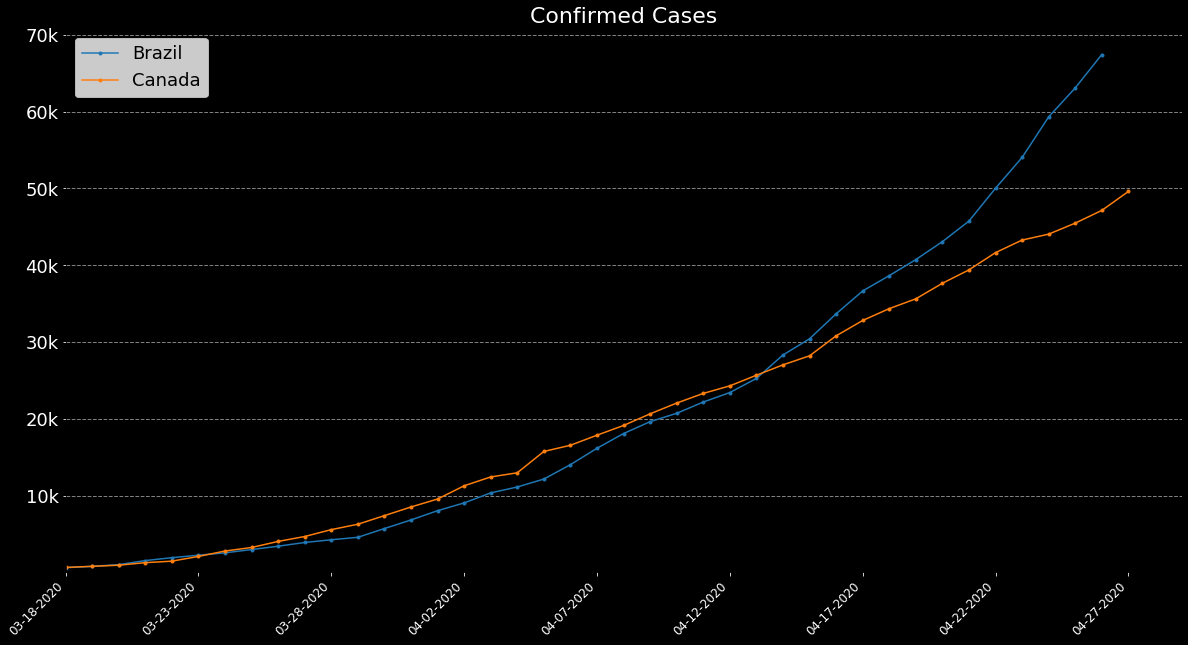

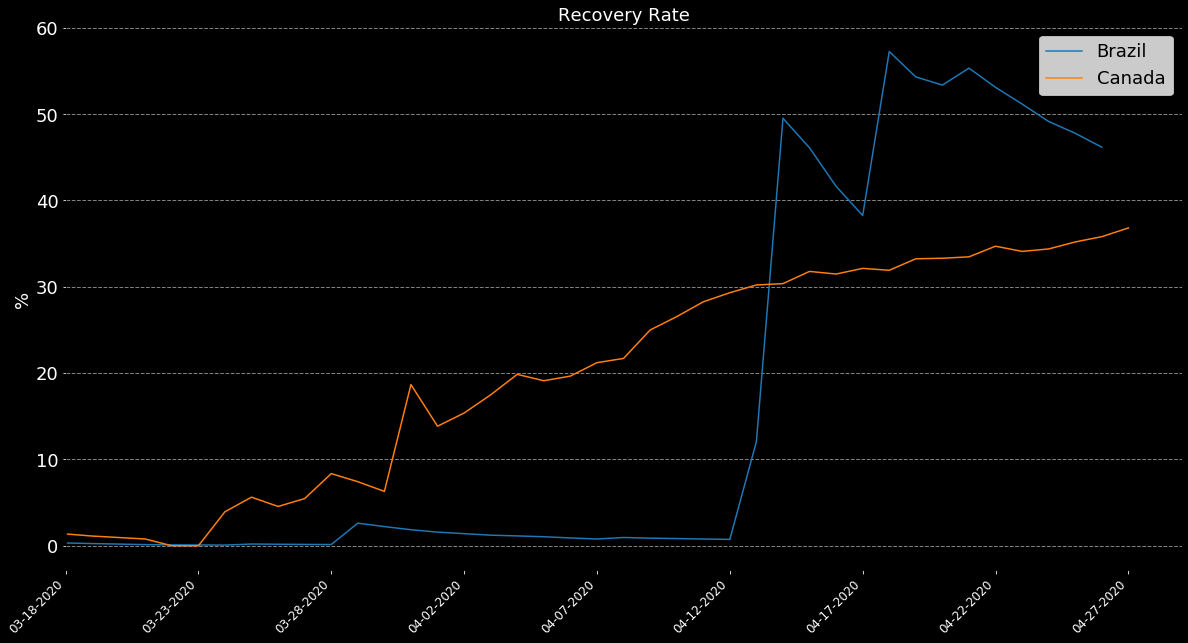

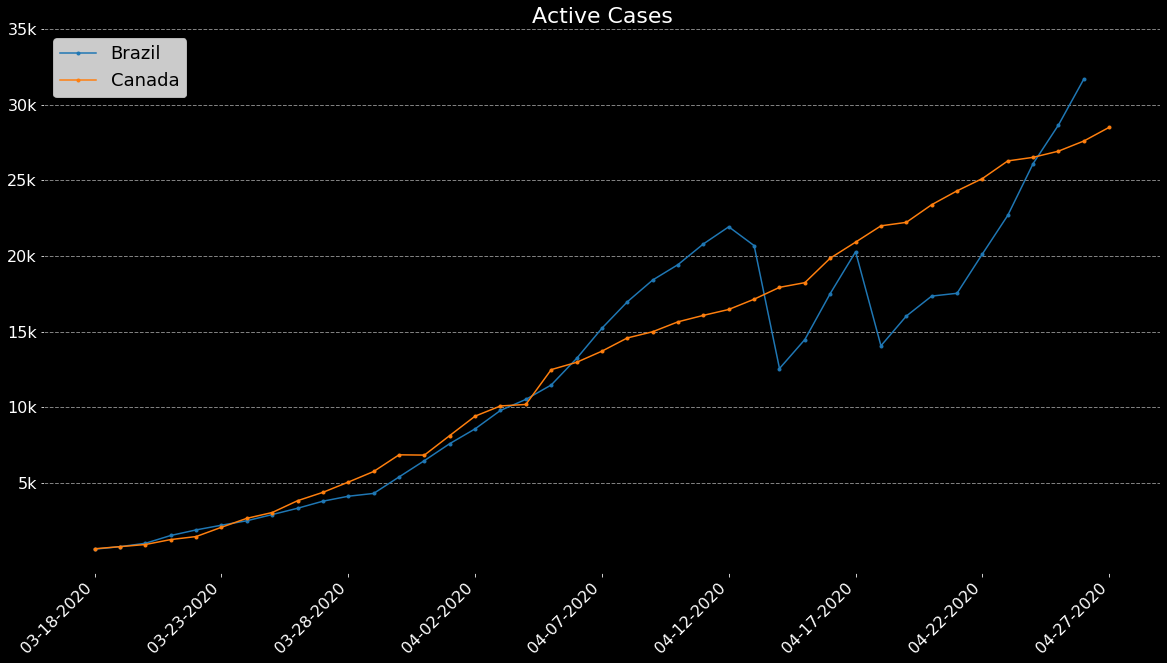

In [23]:
# SK hit 500 on 2/23/20 
# Brazil hit 500 on 3/19/20
# Canada hit 500 on 03-18-2020

fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry(ax, ['Brazil'], '03-19-2020', '03-20-2020')
plot_contry(ax, ['Canada'], '03-18-2020', '03-19-2020')

plt.xlim(0,)
plt.ylim(0,)

yticks = np.arange(10000, 70001, 10000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]

plt.yticks(yticks, labels = yticks_label, fontsize=18)
plt.legend(['Brazil', 'Canada'], fontsize=18)
plt.savefig('img/conf_selection.png', facecolor='black', edgecolor='none')

# Recovery Rate
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry_r(ax, ['Brazil'], '03-19-2020', '03-20-2020')
plot_contry_r(ax, ['Canada'], '03-18-2020', '03-19-2020')
plt.xlim(0,)

plt.legend(['Brazil', 'Canada'], fontsize=18)
plt.savefig('img/rec_selection.png', facecolor='black', edgecolor='none')

# Active
fig, ax = plt.subplots(1, figsize=(20,10), facecolor='black')

plot_contry_a(ax,['Brazil'], '03-19-2020', '03-20-2020')
plot_contry_a(ax,['Canada'], '03-18-2020', '03-19-2020')

yticks = np.arange(5000, 35001, 5000)
yticks_label =[str(i)[:-3] + 'k' for i in yticks]

plt.yticks(yticks, labels = yticks_label, fontsize=16)
plt.xticks(fontsize=16)
plt.legend(['Brazil', 'Canada'], fontsize=18, loc = "upper left")

plt.savefig('img/active_selection.png', facecolor='black', edgecolor='none')

In [11]:
name = ['Taiwan', 'Taiwan*']
df = get_range()
country = df[df['Country'].isin(name)]
country.head()

,Country,Confirmed,Deaths,Recovered,Active,Date
5,Taiwan,1.0,0.0,0.0,1.0,01-22-2020
12,Taiwan,1.0,0.0,0.0,1.0,01-23-2020
7,Taiwan,3.0,0.0,0.0,3.0,01-24-2020
10,Taiwan,3.0,0.0,0.0,3.0,01-25-2020
11,Taiwan,4.0,0.0,0.0,4.0,01-26-2020


In [12]:
def build_pie(name = ''):

    df_pie = build_df(file)

    if name != '':
        if type(name) != str:
            df_pie = df_pie[df_pie['Country'].isin(name)]
            name = name[0]
        else:
            df_pie = df_pie[df_pie['Country'].isin([name])]

    s = df_pie.sum()
    r = s['Recovered'] / s['Confirmed']
    d = s['Deaths'] / s['Confirmed']
    a = s['Active'] / s['Confirmed']

    size_of_groups=[r,d,a]
    names = ['{:,d}'.format(int(r*100))+'%', '{:,d}'.format(int(d*100))+'%', '{:,d}'.format(int(a*100))+'%']
    # Create a pieplot
    plt.pie(size_of_groups, colors= ['lightblue', 'darkgrey', 'orangered'],
            labels=names, labeldistance=1.07, 
            textprops={'fontsize': 22, 'color':'white'})

    # add a circle at the center
    my_circle=plt.Circle( (0,0), 0.7, color='black')
    #p=plt.gcf()
    fig.gca().add_artist(my_circle)

    if name == '': 
        name = 'World'

    plt.text(0, 0,
             name+'\n'+'{:,d}'.format(int(s['Confirmed']))+' Cases', 
             color='white', ha='center', va='center', fontsize=22)
    
    ax.set_facecolor('xkcd:black')

In [13]:
df_pie = build_df(file)

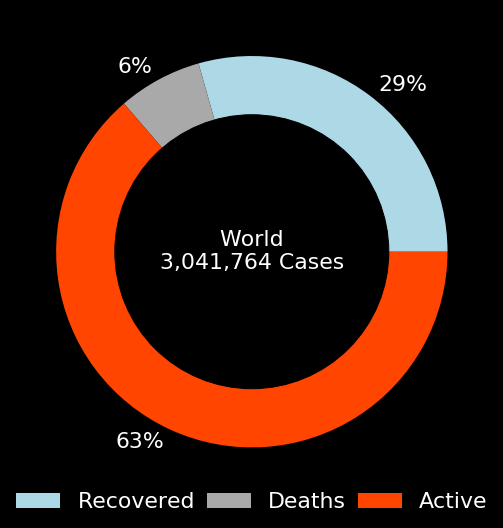

In [14]:
fig, ax = plt.subplots(1, figsize=(16,9), facecolor='black')
build_pie()
# Legend
legend = plt.legend(['Recovered', 'Deaths', 'Active'], frameon=False, 
           bbox_to_anchor=(0., -0.05, 1., -.102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=22)
plt.setp(legend.get_texts(), color='w')
# End of Legend
plt.savefig('img/world_pie.png', facecolor='black', edgecolor='none')

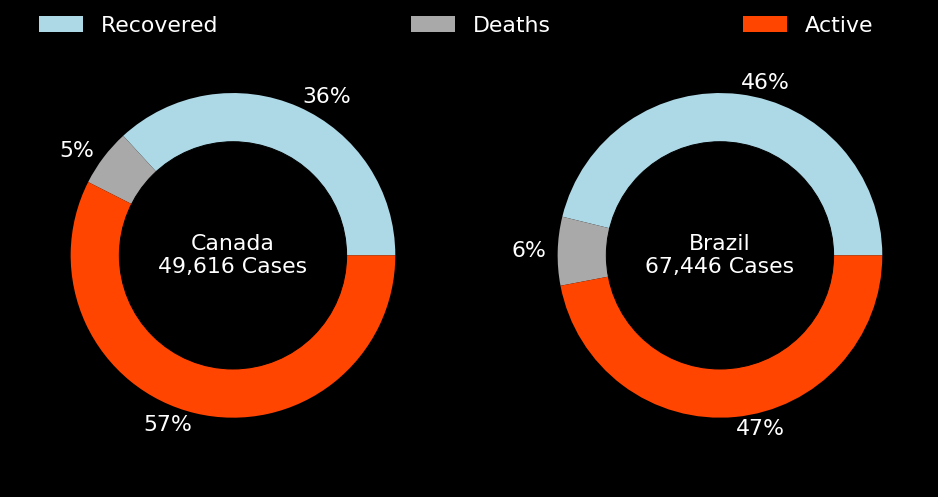

In [15]:
fig, ax = plt.subplots(1, figsize=(16,8), facecolor='black')

ax1 = fig.add_subplot(121, facecolor='black')
build_pie('Canada')

ax = fig.add_subplot(122, facecolor='black')
build_pie('Brazil')

# Legend
legend = plt.legend(['Recovered', 'Deaths', 'Active'], frameon=False, 
           bbox_to_anchor=(-1.2, 1.02, 2.1, .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=22)
plt.setp(legend.get_texts(), color='w')
# End of Legend

plt.savefig('img/selection_pie.png', facecolor='black', edgecolor='none')

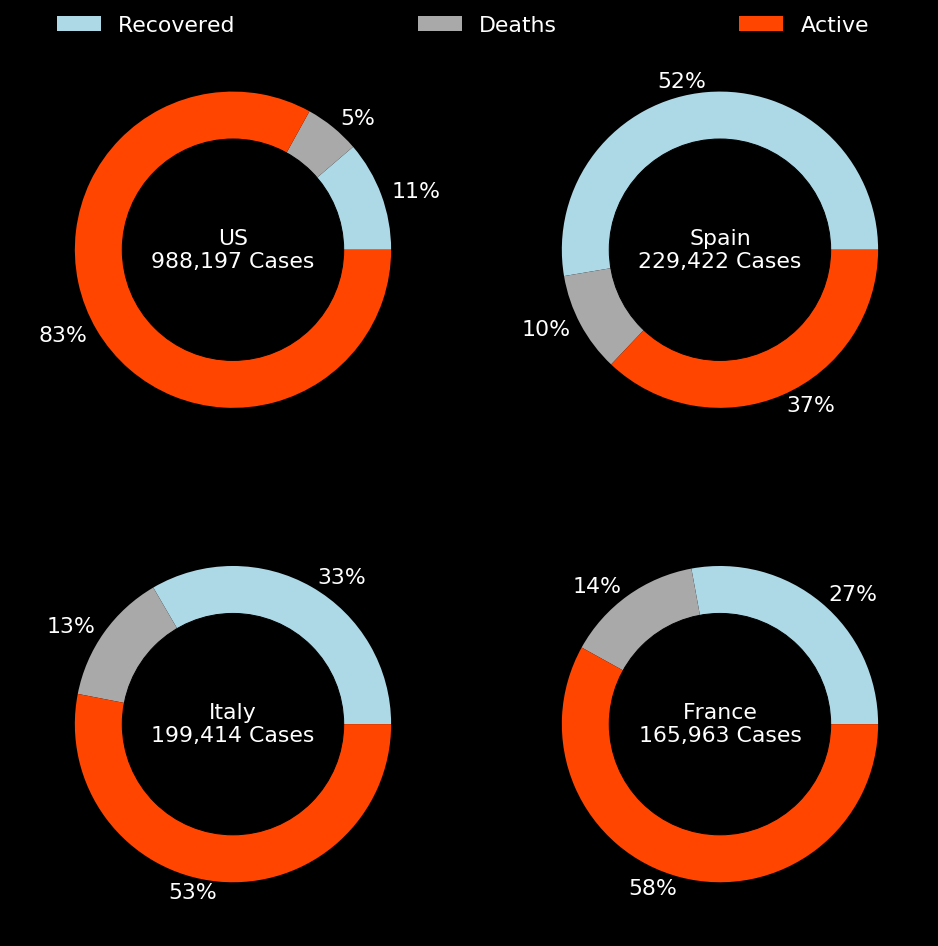

In [16]:
fig, ax = plt.subplots(1, figsize=(16,16), facecolor='black')

ax1 = fig.add_subplot(221, facecolor='black')
build_pie('US')

ax = fig.add_subplot(222, facecolor='black')
build_pie('Spain')

# Legend
legend = plt.legend(['Recovered', 'Deaths', 'Active'], frameon=False, 
           bbox_to_anchor=(-1.2, 1.02, 2.1, .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=22)
plt.setp(legend.get_texts(), color='w')
# End of Legend

ax = fig.add_subplot(223, facecolor='black')
build_pie('Italy')

ax = fig.add_subplot(224, facecolor='black')
build_pie('France')

plt.savefig('img/top_pie.png', facecolor='black', edgecolor='none')

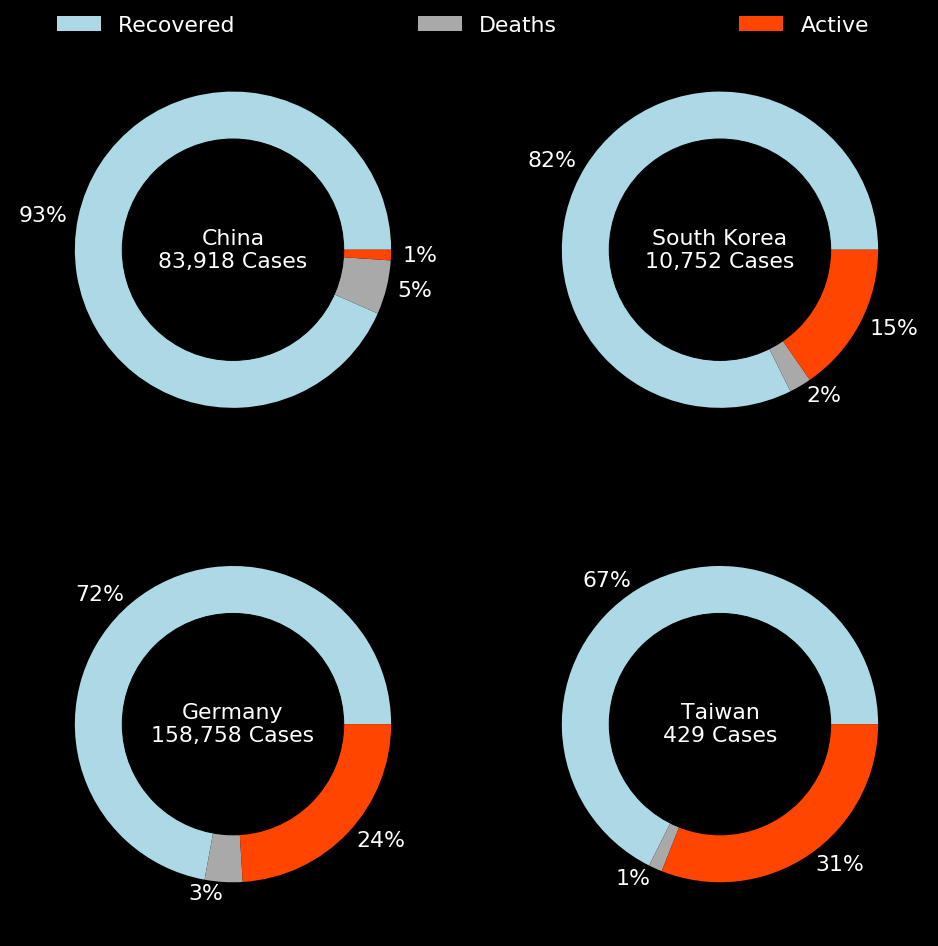

In [17]:
fig, ax = plt.subplots(1, figsize=(16,16), facecolor='black')
#plt.title('Recoveries and Deaths', color='white', fontsize=28)

ax1 = fig.add_subplot(221, facecolor='black')
build_pie(['China', 'Mainland China'])

ax = fig.add_subplot(222, facecolor='black')
build_pie(['South Korea', 'Korea, South'])

# Legend
legend = plt.legend(['Recovered', 'Deaths', 'Active'], frameon=False, 
           bbox_to_anchor=(-1.2, 1.02, 2.1, .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0., fontsize=22)
plt.setp(legend.get_texts(), color='w')
# End of Legend

ax = fig.add_subplot(223, facecolor='black')
build_pie('Germany')

ax = fig.add_subplot(224, facecolor='black')
build_pie(['Taiwan', 'Taiwan*'])

plt.savefig('img/rec_pie.png', facecolor='black', edgecolor='none')

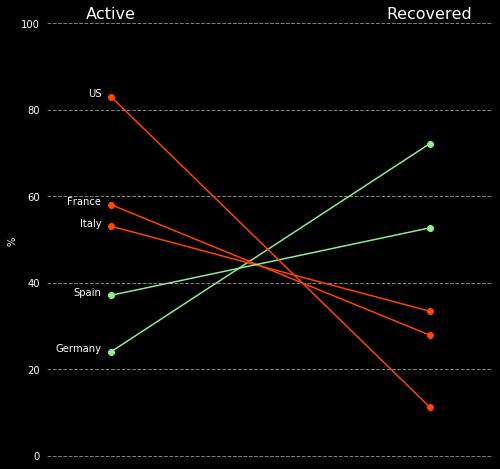

In [18]:
slope_df = build_df(file)
slope_df['r'] = slope_df['Recovered'] / slope_df['Confirmed'] * 100
slope_df['a'] = slope_df['Active'] / slope_df['Confirmed'] * 100
slope_df = slope_df.sort_values('Confirmed')[-5:]

countries = slope_df.Country.unique().tolist()
fig, ax = plt.subplots(1, figsize=(8,8), facecolor='black')

for name in countries:
    color = 'orangered'
    c_df = slope_df[slope_df['Country'] == name]
    
    if c_df['a'].values[0] < c_df['r'].values[0]:
        color='lightgreen'
        
    i = slope_df[slope_df['Country'] == name][['a', 'r']]

    plt.plot([1, 2], i.values[0], marker='o', color=color)
    plt.text(0.97, i.values[0][0], name, ha='right', color='white')
    
plt.text(1, 101, 'Active', ha='center', fontsize=16, color='white')
plt.text(2, 101, 'Recovered', ha='center', fontsize=16, color='white')

# grid
ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'y')
ax.set_axisbelow(True)

# remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#Colors, labels, ticks
ax.set_facecolor('xkcd:black')
plt.xticks([])
plt.yticks(color='white')
plt.ylabel('%', color='white')
plt.ylim(-0.5,100)
plt.xlim(0.8, 2.2)

plt.show()

In [19]:
# deaths method 1
def plot_death_rate(ax, name, first_file='01-22-2020', start='01-23-2020', end=today, inverse=False):
    start = pd.to_datetime(start, format = "%m-%d-%Y")
    end = pd.to_datetime(end, format = "%m-%d-%Y")
    
    df = get_range(first_file, start, end)
    
    country = df[df['Country'].isin(name)]
    
    if inverse:
        country = df[~df['Country'].isin(name)]
        country = country.groupby('Date').sum()
    
    x = np.arange(0, len(country))
    plt.plot(x, country.Deaths /(country.Recovered+country.Deaths) * 100, color='red', linewidth = 2)
    plt.plot(x, country.Deaths /country.Confirmed * 100, color='orange', linewidth = 2)
    
    ax.fill_between(x, 
                    country.Deaths /country.Confirmed * 100,
                    country.Deaths /(country.Recovered+country.Deaths) * 100,
                    color='grey', alpha=0.8)
    
    # grid
    ax.grid(color='grey', linestyle='dashed', linewidth=1, axis = 'y')
    ax.set_axisbelow(True)

    # remove spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    #title
    plt.ylim(-1,100)
    plt.xticks(x[::-7], labels = country.Date.values[::-7], 
                fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(['Concluded Cases Mortality', 'Confirmed Cases Mortality'])
    plt.title(name[0], color='white')
    plt.ylabel('%')
    ax.set_facecolor('xkcd:black')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.yaxis.label.set_color('white')
    ax.xaxis.label.set_color('white')


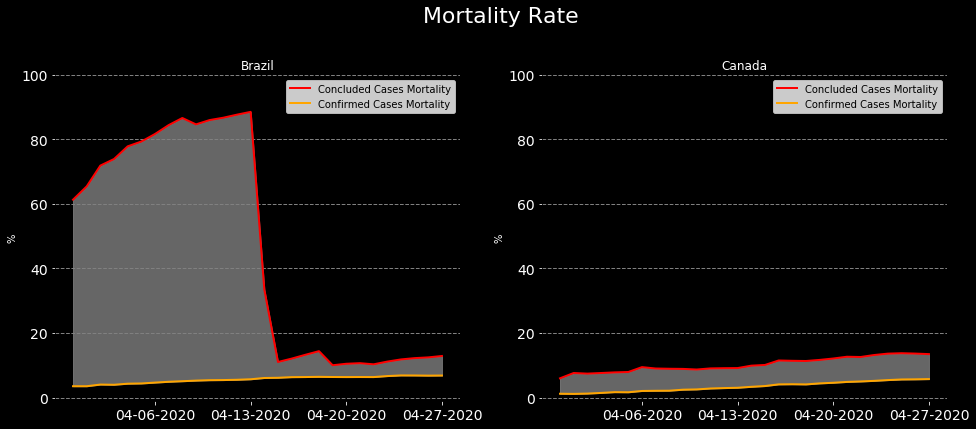

In [20]:
fig, ax = plt.subplots(1, figsize=(16,6), facecolor='black')
plt.title('Mortality Rate\n\n', color='white', fontsize=22)
ax.set_facecolor('black')

ax = fig.add_subplot(121)
plot_death_rate(ax, ['Brazil'], '03-31-2020', '04-01-2020')

ax = fig.add_subplot(122)
plot_death_rate(ax, ['Canada'], '03-31-2020', '04-01-2020')

plt.savefig('img/mort_selection.png', facecolor='black', edgecolor='none')

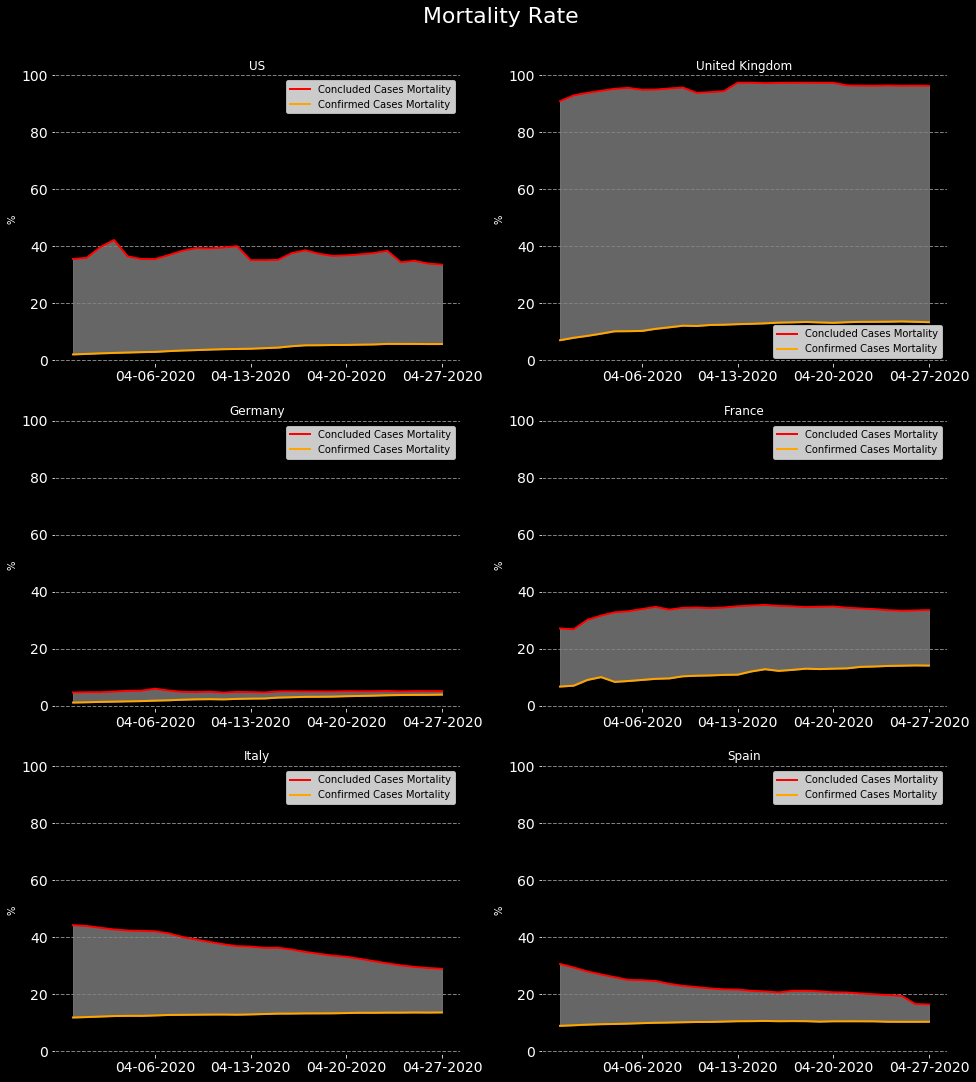

In [21]:
fig, ax = plt.subplots(1, figsize=(16,18), facecolor='black')
plt.title('Mortality Rate\n\n', color='white', fontsize=22)
ax.set_facecolor('black')

ax = fig.add_subplot(321)
plot_death_rate(ax, ['US'], '03-31-2020', '04-01-2020')

ax = fig.add_subplot(322)
plot_death_rate(ax, ['United Kingdom'], '03-31-2020', '04-01-2020')

ax = fig.add_subplot(323)
plot_death_rate(ax, ['Germany'], '03-31-2020', '04-01-2020')

ax = fig.add_subplot(324)
plot_death_rate(ax, ['France'], '03-31-2020', '04-01-2020')

ax = fig.add_subplot(325)
plot_death_rate(ax, ['Italy'], '03-31-2020', '04-01-2020')

ax = fig.add_subplot(326)
plot_death_rate(ax, ['Spain'], '03-31-2020', '04-01-2020')

plt.savefig('img/mort_top.png', facecolor='black', edgecolor='none')

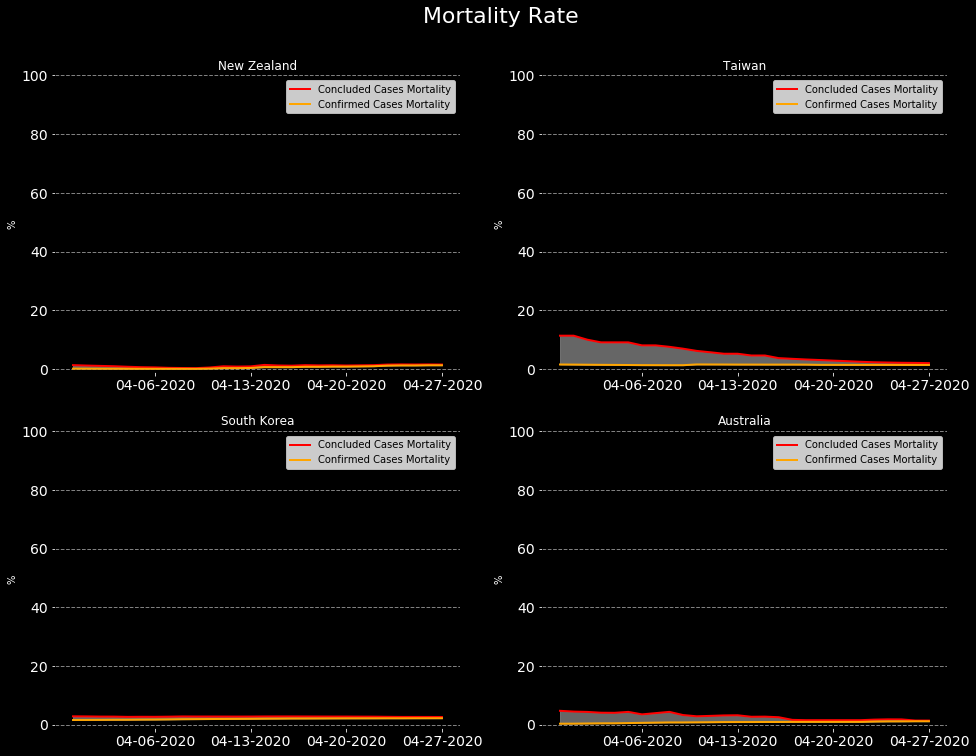

In [22]:
fig, ax = plt.subplots(1, figsize=(16,12), facecolor='black')
plt.title('Mortality Rate\n\n', color='white', fontsize=22)
ax.set_facecolor('black')

ax = fig.add_subplot(221)
plot_death_rate(ax, ['New Zealand'],
                '03-31-2020', '04-01-2020')

ax = fig.add_subplot(222)
plot_death_rate(ax, ['Taiwan', 'Taiwan*'], 
                '03-31-2020', '04-01-2020')

ax = fig.add_subplot(223)
plot_death_rate(ax, ['South Korea', 'Korea, South'], 
                '03-31-2020', '04-01-2020')

ax = fig.add_subplot(224)
plot_death_rate(ax, ['Australia'], '03-31-2020', '04-01-2020')


plt.savefig('img/mort_suc.png', facecolor='black', edgecolor='none')